In [1]:
pip install -U plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install plotly==4.14.1

ERROR: Could not find a version that satisfies the requirement plotly==4.14.1
ERROR: No matching distribution found for plotly==4.14.1


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Data Analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Saving result
import pickle


/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [4]:
employees = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employees.shape

(1470, 35)

In [7]:
employees.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
employees.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
employees.duplicated().sum()

0

In [10]:
employees.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
The statistics on the data show that:

. The mean age of the employees is 36 years old
. They work for 7 years on the company, on average
. The oldest employee in the company works there for 40 years, the youngest less than one year.
. On average, employees are working on the current role for 4 years
. The last promotion happened, on average, 2 years ago.
. Years with current manager seems to follow the trend of the Work in current role variable, having an average of 4 years and a maximum of 17 years
. The company seems to invest in training of the employees, once that on average they had around 3 trainings last year.

In [12]:
employees['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
employees['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
employees['Over18'].unique()

array(['Y'], dtype=object)

In [15]:
employees['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

# Data Visualization

In [16]:
employees['Attrition'] = employees['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
employees['OverTime'] = employees['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employees['Over18'] = employees['Over18'].apply(lambda x: 1 if x == 'Yes' else 0)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

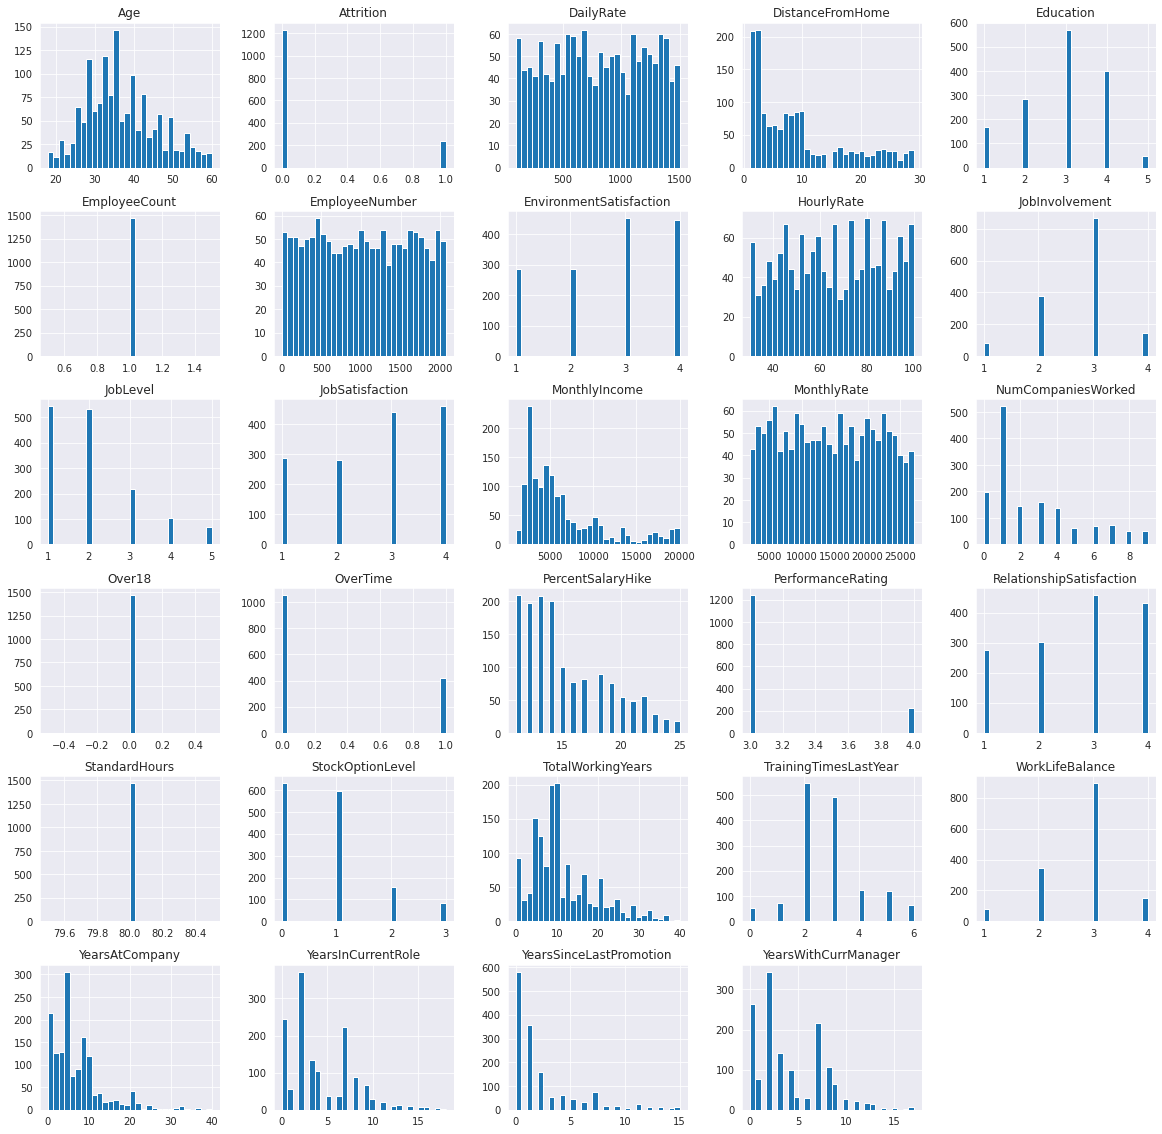

In [18]:
sns.set_style("darkgrid")
employees.hist(bins = 30, figsize=(20,20))

In [ ]:
. Most of the employees are around 30-40 years old
. The attrition variable shows the number of employees wih the potential to leave the company. This number is around 
  200 employees and it is the focus of our study. This variable alone is not enough in the analysis as the reasons why
    people leave the company may be varied.
. Most people live close to work
. There is a greater number of employees with college degrees (number 3 in the Education histogram)
. Regarding salaries, most of the employees earn salaries below 5000 USD
. Most of employees in the research (around 500) only worked in one company.

**Are the employees unhappy with the company? **

In [19]:
employees['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [20]:
att = ['237', '1233']

fig = go.Figure([go.Bar(y=att)])
fig.show()

In [21]:
# Drop some columns
employees.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [22]:
left = employees[employees['Attrition'] == 1]
stayed = employees[employees['Attrition'] == 0]

In [23]:
print('Total = ', len(employees))
print('Number of employees that left the company = ', len(left))
print('% of employees that left the company = ', (len(left)/len(employees)) * 100)
print('Employees that stayed in the company = ', len(stayed))
print('% of employees that stayed in the company ', (len(stayed) / len(employees)) * 100)

Total =  1470
Number of employees that left the company =  237
% of employees that left the company =  16.122448979591837
Employees that stayed in the company =  1233
% of employees that stayed in the company  83.87755102040816


In [24]:
left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [25]:
stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
. As expected, people who left the company earned, on average, less thant the people that stayed (750 USD on average
  of DailyRate for employees who left against 812 for those who stayed).
. On average, people who left lived a bit further from work as compared to those who stayed (10.63 agains 8.91 for 
  DistantceFromHome variable

In [ ]:
Seeing the correlation between the data

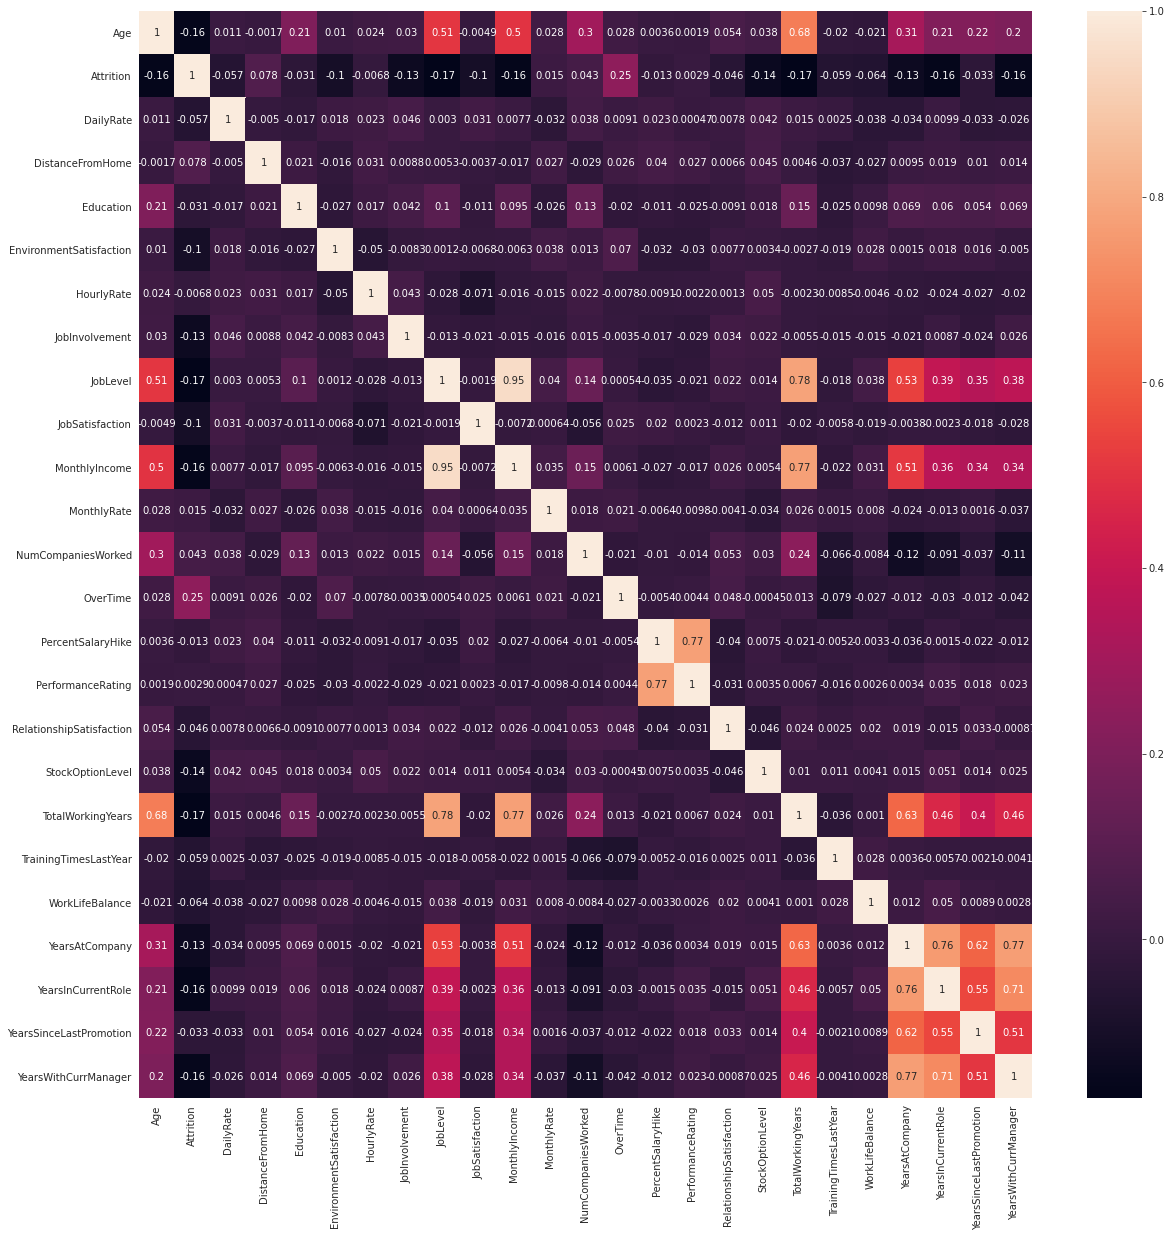

In [26]:
correlations = employees.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True);

In [ ]:
. JobLevel and MonthlyIncome are positively correlated (0.95) as expected

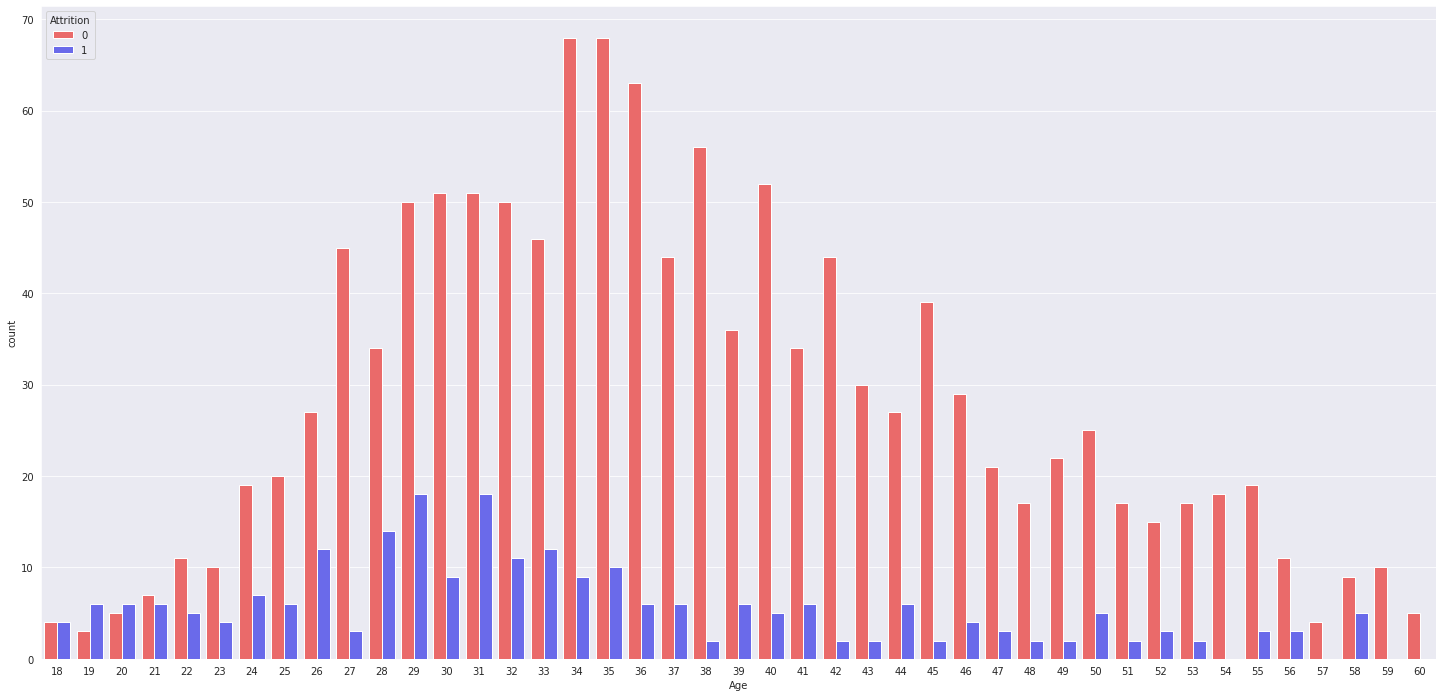

In [27]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data=employees, palette = 'seismic_r');

In [ ]:
Younger people seem to have more tendency to leave the company.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

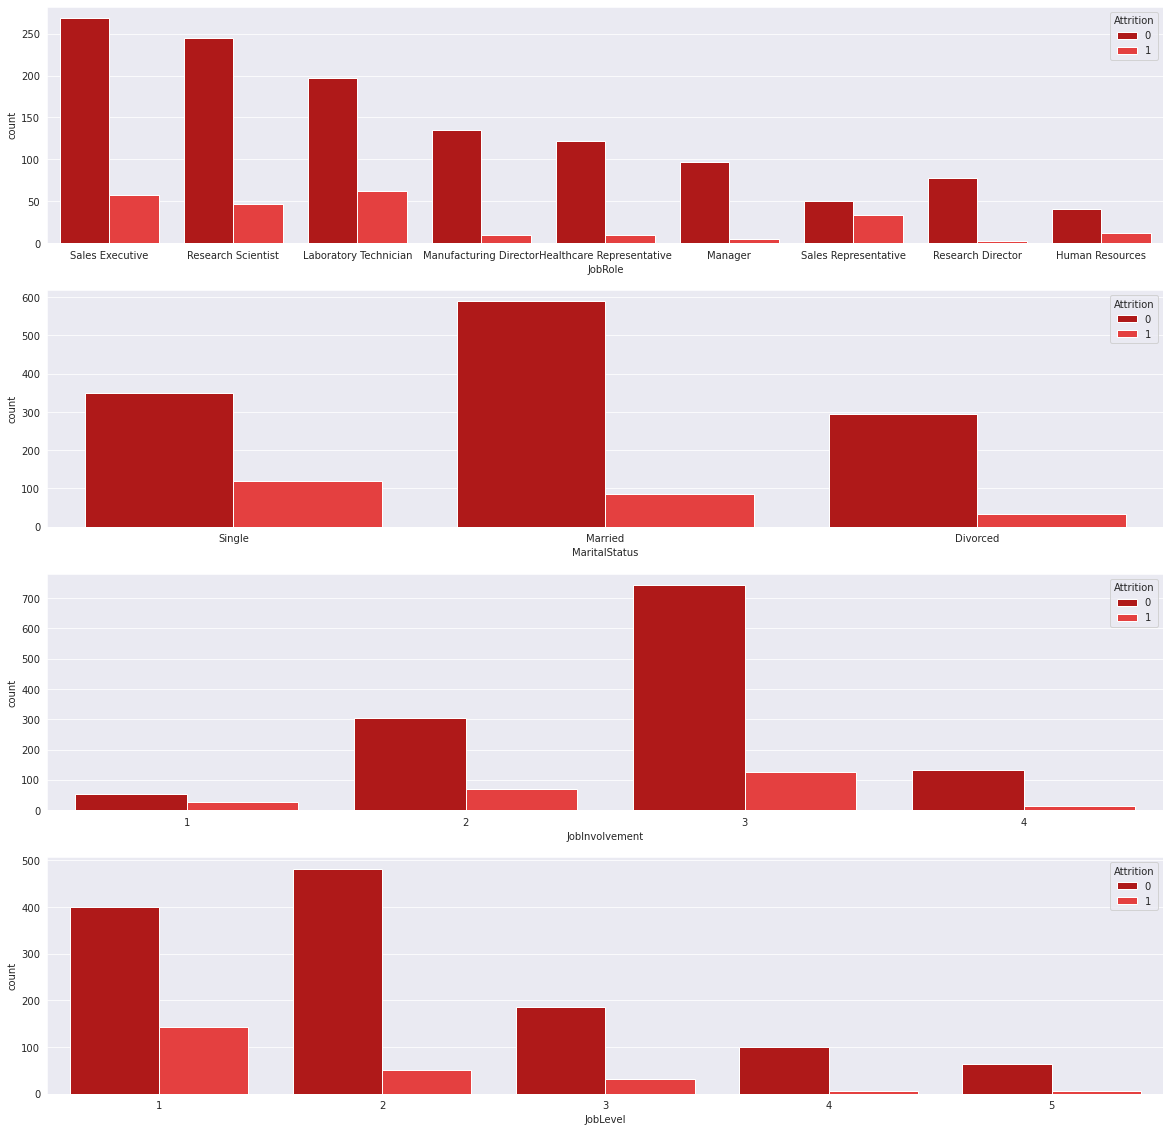

In [28]:
sns.set_palette("seismic_r")
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue='Attrition', data = employees)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employees)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employees) 
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employees)

In [ ]:
. Most people that left the company are in the Sales and Laboratories departments (Sales Executives and Lab Technicians).
. Most people leaving the company are single
. The higher the job level, the less likely is for an employee to leave the company, as we can see from the last plot

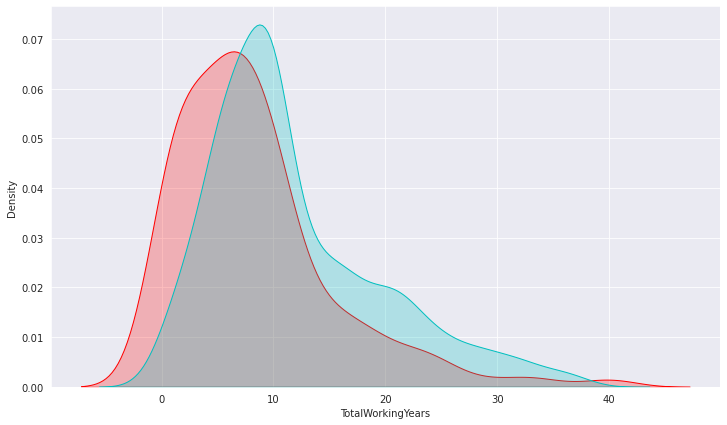

In [29]:
pd.options.plotting.backend = "plotly"
plt.figure(figsize=(12,7))
sns.kdeplot(left['TotalWorkingYears'], label = 'Employees that left', shade = True, color = 'red')
sns.kdeplot(stayed['TotalWorkingYears'], label = 'Employees that stayed', shade = True, color = 'c');

# **KDE (Kernel Density Estimate)**

In [30]:
pd.options.plotting.backend = "plotly"

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

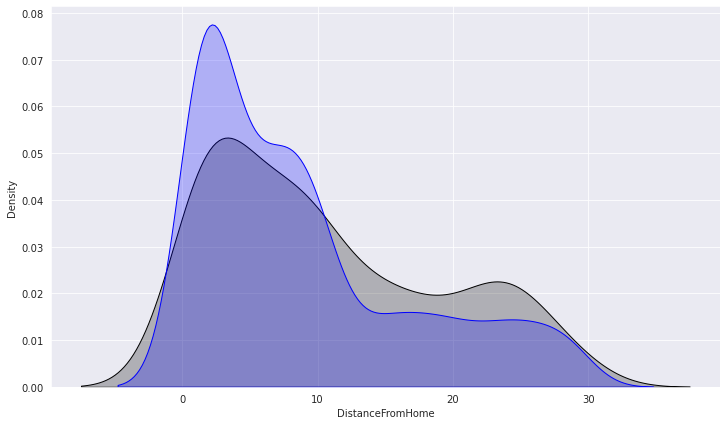

In [31]:
plt.figure(figsize=(12,7))
sns.kdeplot(left['DistanceFromHome'], label = 'Employees that left', shade = True, color = 'k')
sns.kdeplot(stayed['DistanceFromHome'], label = 'Employeed that statyed', shade = True, color = 'b')

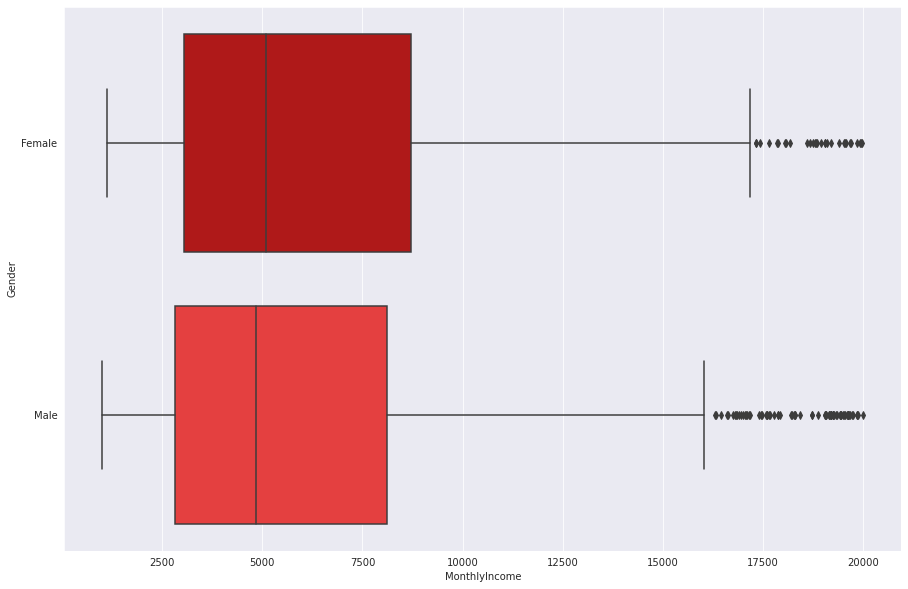

In [32]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employees);

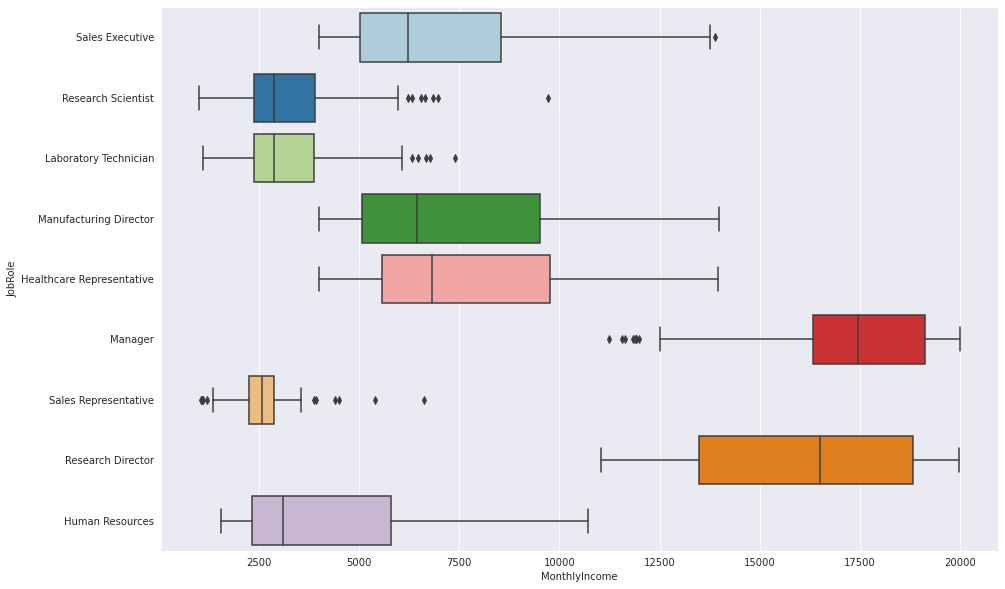

In [33]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employees, palette='Paired');

In [ ]:
. Sales Representative have the lowest range of salaries while Managers and Research Directors have salaries in the highest ranges.

# **Preparing data for Machine Learning**

In [34]:
 employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [35]:
# Creating a dataframe categorical variables
X_categoricals = employees[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_categoricals

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
Transforming categorical variable to numerical:
    

In [36]:
onehotencoder = OneHotEncoder()
X_categoricals = onehotencoder.fit_transform(X_categoricals).toarray()

In [37]:
X_categoricals = pd.DataFrame(X_categoricals)
type(X_categoricals)

pandas.core.frame.DataFrame

In [38]:
employees['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [39]:
X_categoricals

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
X_numerical = employees[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                         'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                         'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
                         'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 
                         'WorkLifeBalance',	'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion',
                         'YearsWithCurrManager']]

X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
Merging both dataframes with the input information for the model:
    

In [ ]:
Merging both dataframes with the input information for the model:

In [41]:
X_conct = pd.concat([X_categoricals, X_numerical], axis = 1)
X_conct

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [42]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_conct)

In [ ]:
Labels for the model:

In [43]:
y = employees['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [45]:
X_train.shape, y_train

((1102, 50),
 276     0
 1231    0
 62      0
 17      0
 1198    0
        ..
 939     1
 1326    1
 9       0
 382     1
 296     1
 Name: Attrition, Length: 1102, dtype: int64)

In [46]:
X_test.shape, y_test

((368, 50),
 64      0
 1075    0
 364     0
 135     0
 565     0
        ..
 248     0
 306     0
 109     0
 605     0
 981     1
 Name: Attrition, Length: 368, dtype: int64)

# **Training the Model with Logistic Regeression**

In [47]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [49]:
accuracy_score(y_test, y_pred)

0.8586956521739131

In [50]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[296,   5],
       [ 47,  20]])

<AxesSubplot:>

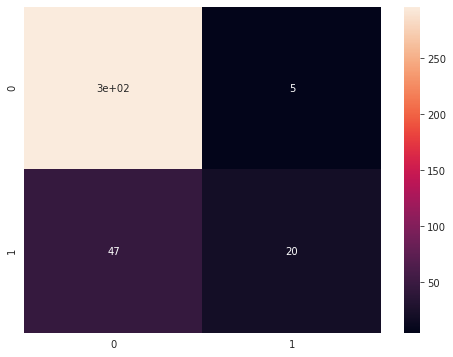

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)

In [52]:
precision_score(y_test, y_pred)

0.8

In [ ]:
Because this is an unbalanced dataset, only evaluating accuracy is not enough, we have to check other parameters, 
in special recall.

In [53]:
recall_score(y_test, y_pred)

0.29850746268656714

In [54]:
f1_score(y_test, y_pred, average='macro')

0.6770186335403727

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       301
           1       0.80      0.30      0.43        67

    accuracy                           0.86       368
   macro avg       0.83      0.64      0.68       368
weighted avg       0.85      0.86      0.83       368



In [ ]:
Recall is not so good for class 1 - which means the model is not good in identifying the people that will leave the company (0.52 or 52%). 
This may be caused by the fact that this is an unbalanced dataset. For the identification of people who are going to stay
in the company, the model is good in the prediction, having a recall of 95%.

# **Training the Model with Random Forest**

In [56]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = forest.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [58]:
accuracy_score(y_test, y_pred)

0.8369565217391305

In [59]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[299,  58],
       [  2,   9]])

<AxesSubplot:>

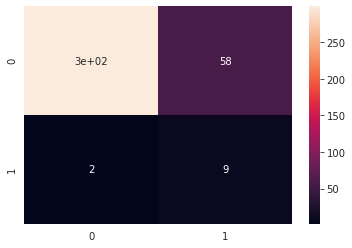

In [60]:
sns.heatmap(cm, annot=True)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       301
           1       0.82      0.13      0.23        67

    accuracy                           0.84       368
   macro avg       0.83      0.56      0.57       368
weighted avg       0.83      0.84      0.79       368



# **Training the Model with Neural Network**

In [62]:
X_train.shape

(1102, 50)

In [ ]:
Number of neurons for the network: (inputs + outputs)/2 which is approximately 25.

In [63]:
neuralmod = tf.keras.models.Sequential()
neuralmod.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
neuralmod.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
neuralmod.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))

#Output of classification model
neuralmod.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [64]:
neuralmod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [65]:
neuralmod.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [66]:
neuralmod.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.8430
Epoch 2/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3884 - accuracy: 0.8457
Epoch 3/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8294
Epoch 4/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8621
Epoch 5/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8754
Epoch 6/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8657
Epoch 7/200
35/35 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8933
Epoch 8/200
35/35 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.8986
Epoch 9/200
35/35 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.9020
Epoch 10/200
35/35 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.9020
Epoch 11/

35/35 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9932
Epoch 84/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.9980
Epoch 85/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9992
Epoch 86/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9982
Epoch 87/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9999
Epoch 88/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9993
Epoch 89/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.9989
Epoch 90/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9999
Epoch 91/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9997
Epoch 92/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9993
Epoch 93/200


35/35 [==============================] - 0s 1ms/step - loss: 3.2495e-04 - accuracy: 1.0000
Epoch 164/200
35/35 [==============================] - 0s 1ms/step - loss: 3.2875e-04 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 1ms/step - loss: 3.2903e-04 - accuracy: 1.0000
Epoch 166/200
35/35 [==============================] - 0s 1ms/step - loss: 2.8899e-04 - accuracy: 1.0000
Epoch 167/200
35/35 [==============================] - 0s 1ms/step - loss: 2.9192e-04 - accuracy: 1.0000
Epoch 168/200
35/35 [==============================] - 0s 1ms/step - loss: 2.7062e-04 - accuracy: 1.0000
Epoch 169/200
35/35 [==============================] - 0s 1ms/step - loss: 3.4772e-04 - accuracy: 1.0000
Epoch 170/200
35/35 [==============================] - 0s 1ms/step - loss: 2.9539e-04 - accuracy: 1.0000
Epoch 171/200
35/35 [==============================] - 0s 1ms/step - loss: 3.1153e-04 - accuracy: 1.0000
Epoch 172/200
35/35 [==============================] - 0s 1ms/step - 

In [67]:
y_pred = neuralmod.predict(X_test)
y_pred

array([[1.31847422e-09],
       [6.62086445e-12],
       [4.21130630e-11],
       [4.28644682e-14],
       [1.74365482e-06],
       [1.45811224e-10],
       [1.24577251e-10],
       [1.48976359e-10],
       [2.37739106e-10],
       [2.15936016e-05],
       [1.00000000e+00],
       [3.42455506e-03],
       [1.00000000e+00],
       [5.97418257e-05],
       [2.79135793e-06],
       [2.58548062e-05],
       [1.15204782e-14],
       [2.12252140e-02],
       [4.09248246e-10],
       [9.25461769e-01],
       [6.97900973e-08],
       [1.31464924e-06],
       [1.27930218e-08],
       [1.95731822e-08],
       [4.86101122e-13],
       [2.43403097e-16],
       [7.38324957e-08],
       [8.28788810e-16],
       [3.44293323e-16],
       [9.62535329e-11],
       [1.01794580e-10],
       [2.03258514e-06],
       [1.41192538e-06],
       [8.39169267e-09],
       [3.83192089e-12],
       [1.26394643e-05],
       [7.33268047e-13],
       [9.75547731e-01],
       [3.73538049e-12],
       [9.99941945e-01],


In [68]:
y_pred = (y_pred >= 0.50)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [69]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[268,  33],
       [ 39,  28]])

<AxesSubplot:>

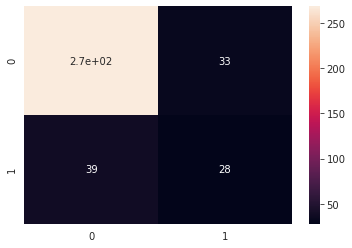

In [70]:
sns.heatmap(cm, annot=True)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       301
           1       0.46      0.42      0.44        67

    accuracy                           0.80       368
   macro avg       0.67      0.65      0.66       368
weighted avg       0.80      0.80      0.80       368



In [ ]:
This was the best model, but still with a recall for class 1 that indicates the model is having difficulty in detecting the
probability of employees leaving the company (recall = 65%).

In [ ]:
https://www.kaggle.com/marianaalm/ibm-hr-logreg